<a href="https://colab.research.google.com/github/esis-a-i/Python-Analytic-Adv-HSE/blob/main/HWs/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1. 60 баллов
Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA
Скачайте его.

Оцениваем факторы, которые влияют на цену на аренду в Москве.
Описание столбцов:

**metro** - ближайшая станция метро

**price** - цена за аренды


**minutes** - расстояние до метро в минутах

**way** - пусть до метро (пешком или на транспорте)

**views** - просмотры квартиры

**provider** - кто сдает квартиру (собственник, риелтор, застройщик)

**fee_percent** - процент, который получает риелтор

**storey**- этаж

**storeys**- число этажей в здании

**living_area** - жилая площаль

**kitchen_area** - площадь кухни

**total_area** - общая площадь


#### Часть 1. EDA. 10 баллов

In [4]:
import pandas as pd
df = pd.read_csv('rent.csv', index_col=0)

1. Отобразите первые 5 и последние 5 строк. (**1**)

In [5]:
df.head(5)

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [6]:
df.tail(5)

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
1441,Solntcevo,25000,walk,189,realtor,0,6,5,23,20,10,36
1442,Ulitca Starokachalovskaia,25000,walk,173,realtor,0,5,5,17,20,10,38
1443,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1444,Preobrazhenskaia ploshchad,40000,walk,60,realtor,30,3,17,9,20,8,35
1445,Rasskazovka,30000,walk,2728,owner,0,12,10,17,22,8,33


2. Посчитайте описательные статистики числовых переменных с помощью describe() (**1**)

In [7]:
df.describe()

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


3. Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (**1**)

In [8]:
df["metro"].nunique()

119

4. Есть ли в датасете пропуски? (**1**)

In [9]:
df.isna().sum()

,0
metro,0
price,0
way,0
views,0
provider,0
fee_percent,0
storey,0
minutes,0
storeys,0
living_area,0


5. Есть ли в датасете полные дубликаты? (**1**)

In [ ]:
df.duplicated().sum()

1201

6. Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (**1**)

In [ ]:
df["provider"].unique()

array(['realtor                \xa0 \xa0 ', 'owner                 ',
       'realtor                 ',
       'agency                \xa0 \xa0\xa0 \xa0 ',
       'agency                \xa0 \xa0 ', 'agency                 ',
       'Застройщик                 '], dtype=object)

In [10]:
df["provider"] = df["provider"].apply(lambda x: x.strip().replace('\xa0', ''))

In [11]:
df["provider"].unique()

array(['realtor', 'owner', 'agency', 'Застройщик'], dtype=object)

7. Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (**1**)

In [13]:
import matplotlib.pyplot as plt

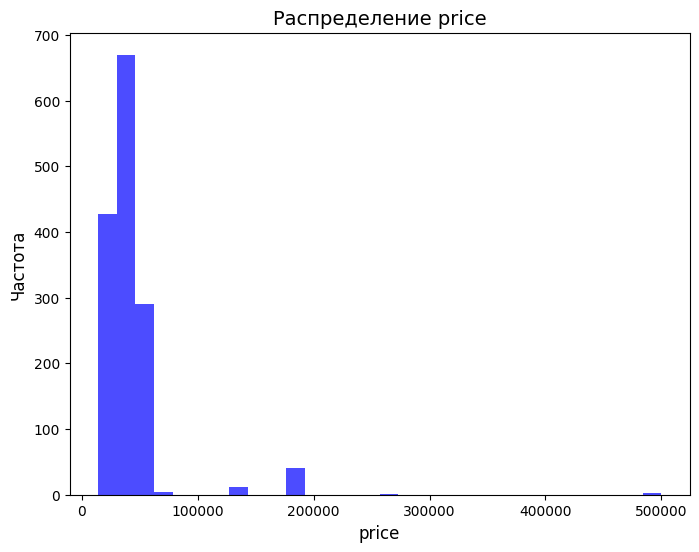

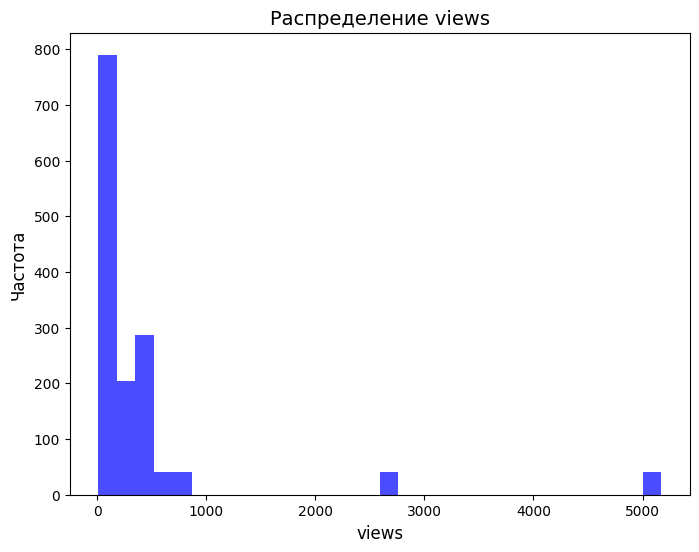

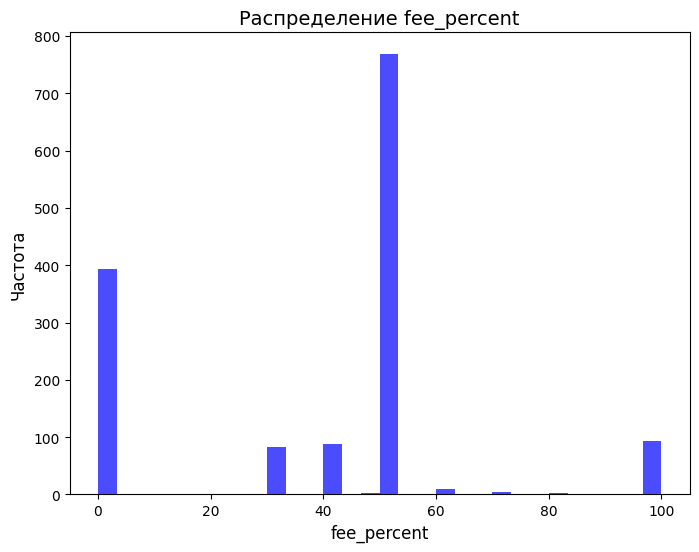

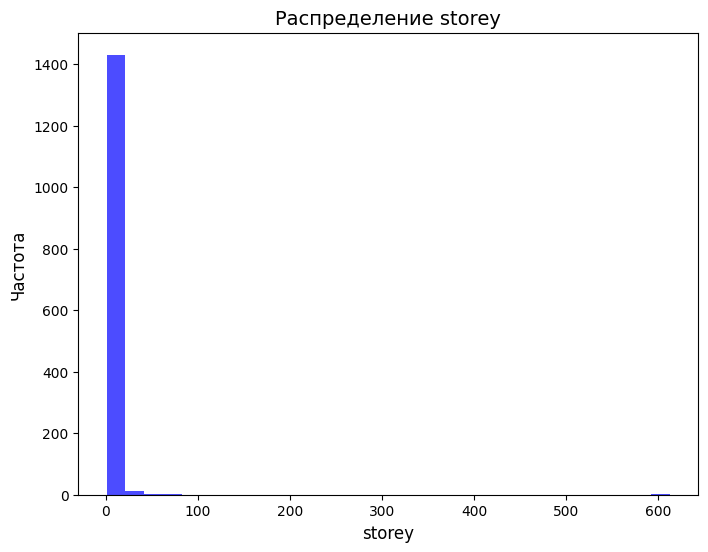

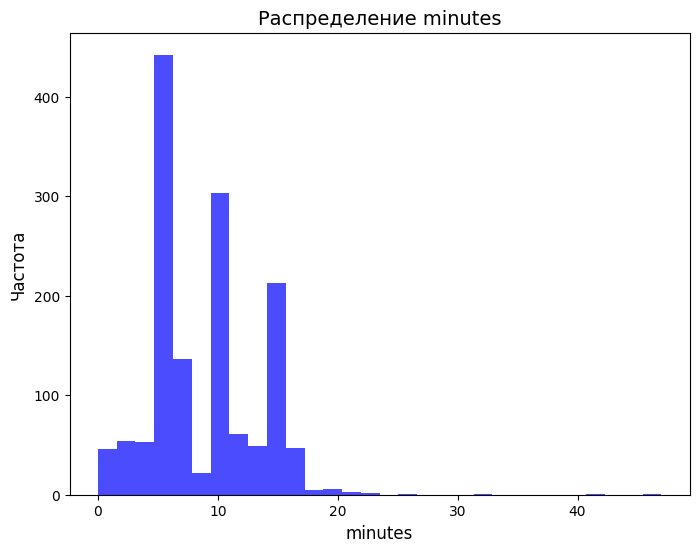

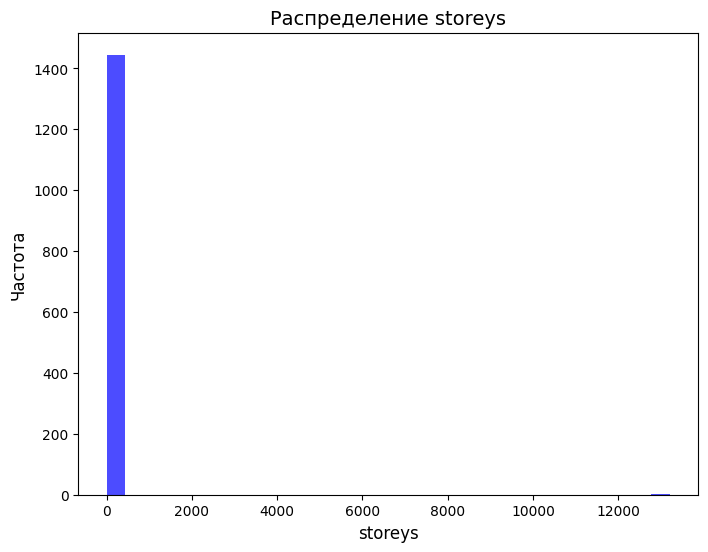

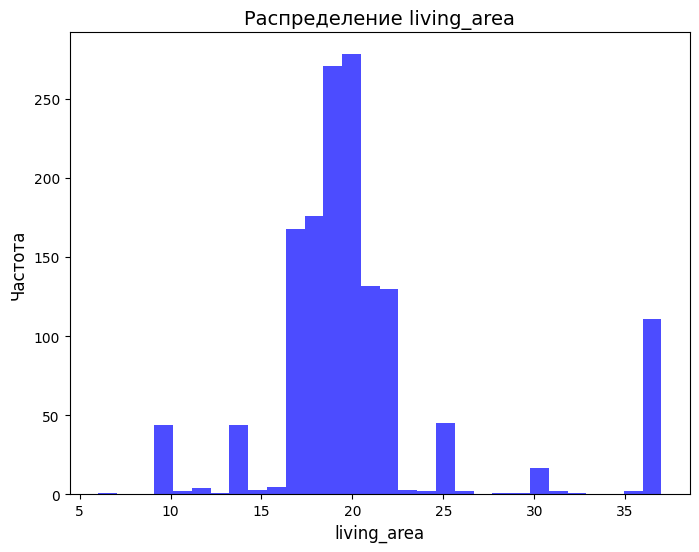

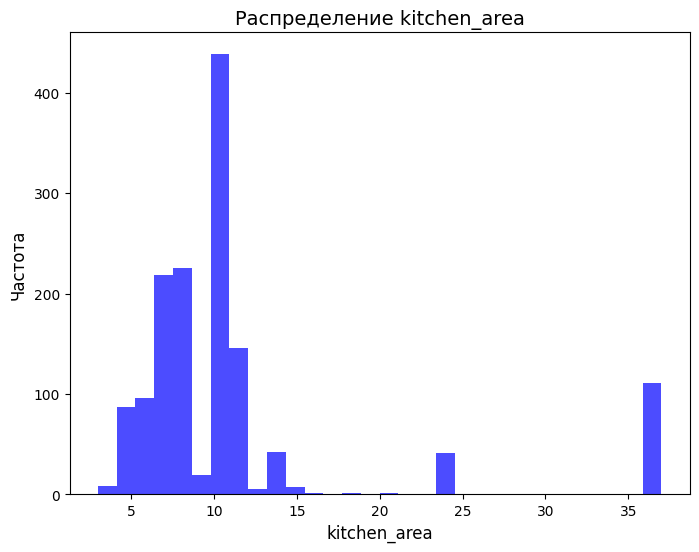

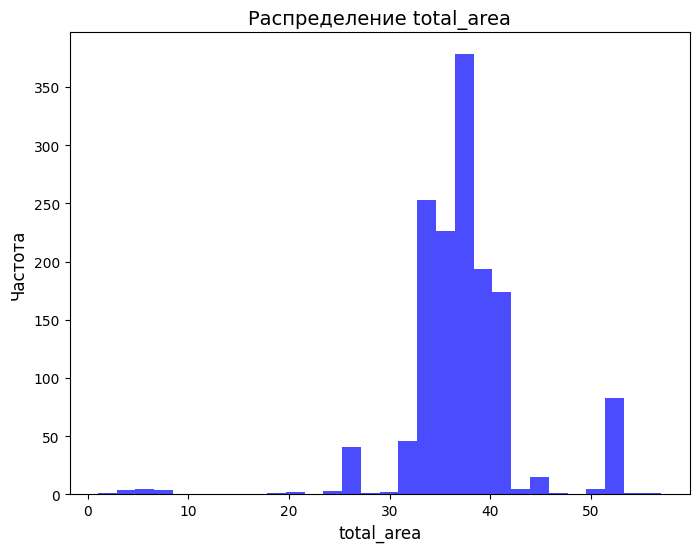

In [14]:
numerical_columns = ['price', 'views', 'fee_percent', 'storey', 'minutes', 'storeys', 'living_area', 'kitchen_area', 'total_area']

for column in numerical_columns:
  plt.figure(figsize=(8,6))
  plt.hist(df[column].dropna(), bins=30, color='blue', alpha=0.7)
  plt.title(f'Распределение {column}', fontsize=14)
  plt.xlabel(column, fontsize=12)
  plt.ylabel('Частота', fontsize=12)
  plt.show()

8. Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (**1**)

In [15]:
import seaborn as sns

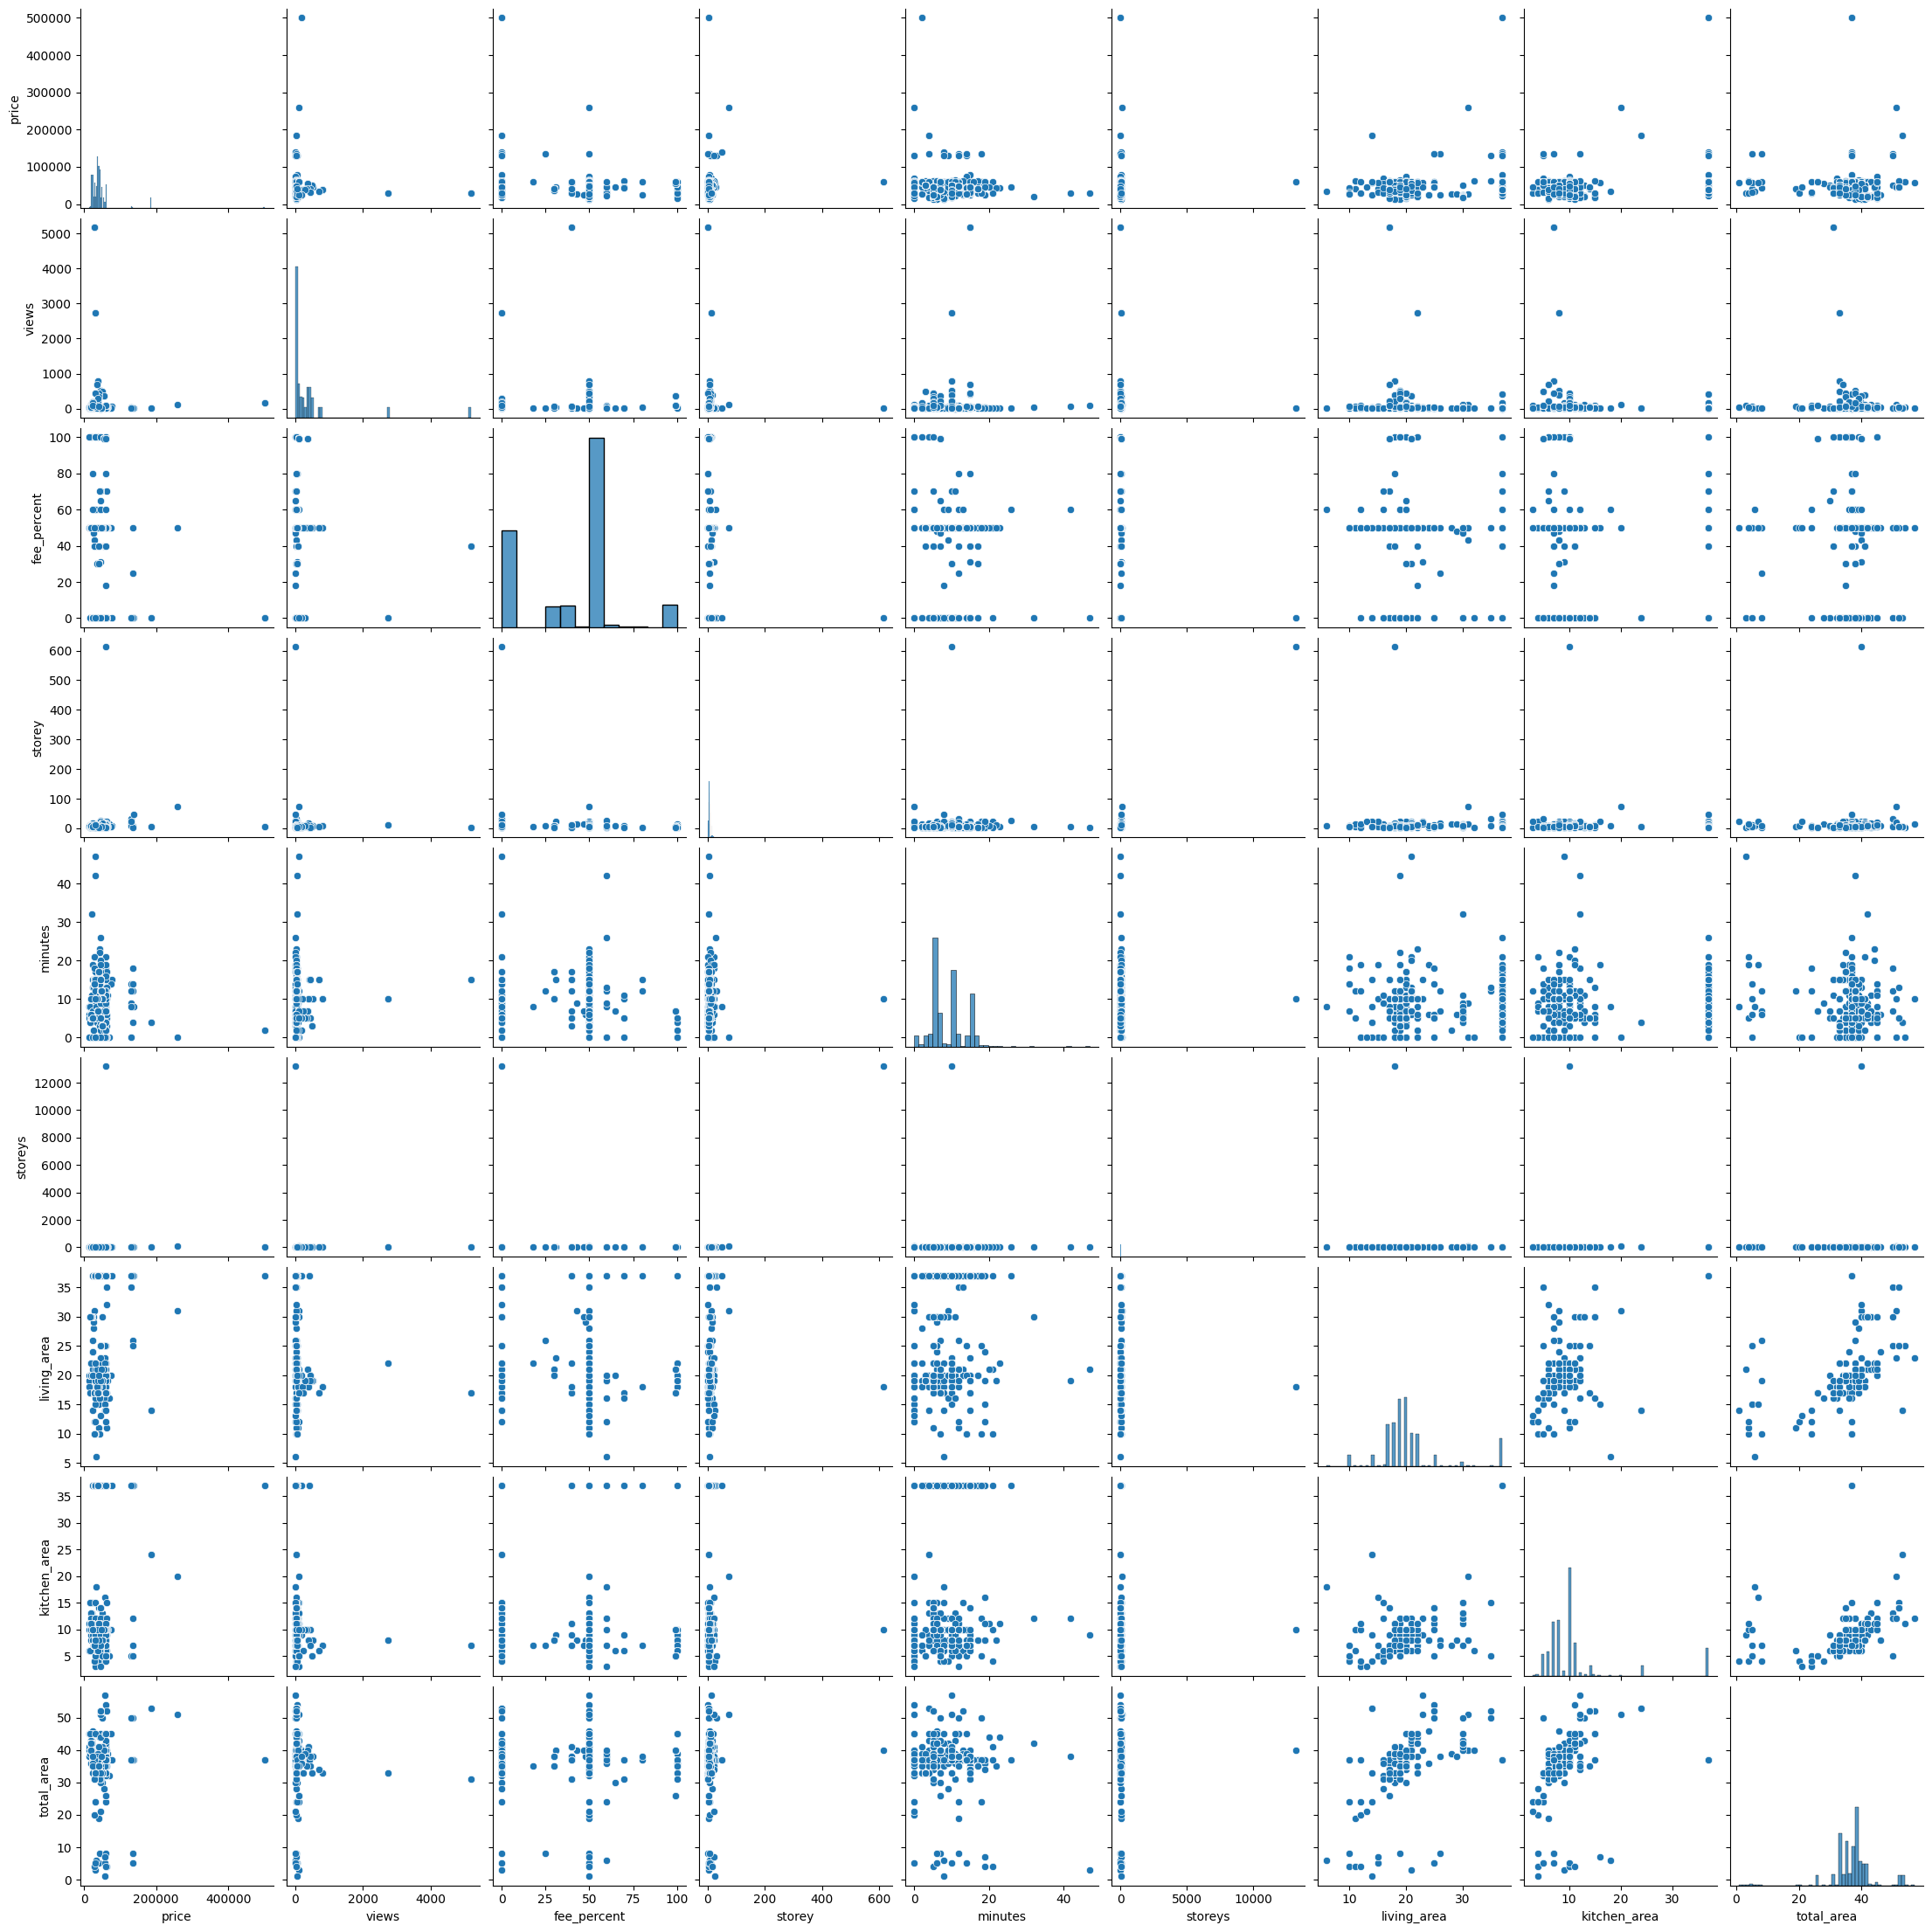

In [16]:
sns.pairplot(df[numerical_columns])

9. Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (**2**)

In [17]:
df[numerical_columns].corr()

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
price,1.000000,-0.120809,-0.115895,0.027764,-0.171879,0.015654,0.005778,0.336511,0.274565
views,-0.120809,1.000000,-0.039790,-0.026814,0.247020,-0.014884,-0.101520,-0.152155,-0.250220
fee_percent,-0.115895,-0.039790,1.000000,-0.039812,0.094115,-0.034967,-0.107158,-0.157209,-0.234524
storey,0.027764,-0.026814,-0.039812,1.000000,-0.032928,0.967711,0.000485,-0.013906,0.029073
minutes,-0.171879,0.247020,0.094115,-0.032928,1.000000,0.001864,-0.004648,-0.034461,-0.244880
storeys,0.015654,-0.014884,-0.034967,0.967711,0.001864,1.000000,-0.011504,-0.005318,0.009851
living_area,0.005778,-0.101520,-0.107158,0.000485,-0.004648,-0.011504,1.000000,0.793978,0.143980
kitchen_area,0.336511,-0.152155,-0.157209,-0.013906,-0.034461,-0.005318,0.793978,1.000000,0.273322
total_area,0.274565,-0.250220,-0.234524,0.029073,-0.244880,0.009851,0.143980,0.273322,1.000000


между kitchen_area и living_area, storeys и storey, fee_percent и minutes

#### Часть 2. Построение модели. 50 баллов

1. Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные. Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (**5**)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
X = df[numerical_columns]
y = df["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_test)

2. Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (**5**)

In [75]:
MSE(y_test, y_pred)

5.383131695066473e-21

In [76]:
RMSE(y_test, y_pred)

7.336982823386241e-11

3. Закодируйте переменные way	и	provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [53]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [77]:
categorical_columns = ['way', 'provider']

ohe = OneHotEncoder(drop='first', sparse_output=False)
X_category = ohe.fit_transform(df[categorical_columns])

X_combined = np.hstack((X_scaled, X_category))
X_combined

array([[ 0.03700292,  0.10156171,  0.44823923, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.18751168, -0.03088735,  0.44823923, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.18751168,  0.06951758,  0.44823923, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.5650321 , -0.33744282, -1.41159986, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11350584, -0.3823046 , -0.29569641, ...,  0.        ,
         1.        ,  0.        ],
       [-0.41452335,  2.46748636, -1.41159986, ...,  1.        ,
         0.        ,  0.        ]])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = lr.predict(X_test)

In [81]:
MSE(y_test, y_pred)

1.0383044874071828e-20

In [82]:
RMSE(y_test, y_pred)

1.0189722701855939e-10

4. Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!) Выбросами считайте цены, которые дороже, чем $Q3+1.5 * IQR$, где $IQR$ - межквартильный размах, $Q3$ - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [86]:
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1

non_outliers_mask = y_train <= (Q3 + 1.5 * IQR)
X_train_cleaned = X_train[non_outliers_mask]
y_train_cleaned = y_train[non_outliers_mask]

lr = LinearRegression()
lr.fit(X_train_cleaned, y_train_cleaned)

LinearRegression()

In [87]:
y_pred = lr.predict(X_test)

In [88]:
MSE(y_test, y_pred)

9.859445251019641e-21

In [89]:
RMSE(y_test, y_pred)

9.929473929176531e-11

5. Попробуйте написать свою реализацию функций MSE, RMSE, R2. Функции должны принимать на вход numpy-массив истинных значений и предсказаний и возвращать результат. Примените функции к предсказаниям последней модели. Сравните результат с библиотечной реализацией. (**9**)

Напоминаем, что

${MSE}=\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$, где $y_i$ - истинное значение на i-ом наблюдении, $\hat{y_i}$  - предсказание модели на i-ом наблюдении.

Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

R2 (коэффициент детерминации) - доля дисперсии, объясненная моделью. Поподробнее о реалиации можно почитать здесь: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

In [94]:
def MSE(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

In [95]:
MSE(y_test, y_pred)

9.859445251019641e-21

In [96]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.sum((y_true - y_pred) ** 2) / len(y_true))

In [97]:
RMSE(y_test, y_pred)

9.929473929176531e-11

In [98]:
def r2(y_true, y_pred):
    y_true_mean = np.mean(y_true)

    ss_res = np.sum((y_true - y_pred) ** 2)

    ss_tot = np.sum((y_true - y_true_mean) ** 2)

    r_squared = 1 - (ss_res / ss_tot)

    return r_squared

In [99]:
r2(y_test, y_pred)

1.0

6. Напишите класс CleanData. Этот класс будет отвечать за заполнение пропусков и кодирование переменных методами OneHotEncoding и MeanTargetEncoding. (**15**). В классе обязательно должны присутствовать методы fit и transform. transform должен возвращать трансформированный датасет.
Пользователь при создании экземпляра класса может указывать:
- список столбцов для кодирования OneHotEncoding
- список столбцов для кодирования MeanTargetEncoding
- стратегию заполнения пропусков (заполнение средним / медианным значением и т.п.; можете принимать на вход словарь, чтобы реализовать разные стратегии для разных столбцов)

 Все остальные особенности реализации остаются на Ваше усмотрение.

In [114]:
class CleanData:
    def __init__(self, one_hot_cols=None, mean_target_cols=None, fill_strategy=None):
        self.one_hot_cols = one_hot_cols if one_hot_cols is not None else []
        self.mean_target_cols = mean_target_cols if mean_target_cols is not None else []
        self.fill_strategy = fill_strategy if fill_strategy is not None else {}
        self.one_hot_encoders = {}
        self.mean_target_means = {}
        self.fill_values = {}

    def fit(self, X, y=None):
        for col in self.one_hot_cols:
            ohe = OneHotEncoder(sparse_output=False, drop='first')
            ohe.fit(X[[col]])
            self.one_hot_encoders[col] = ohe

        if y is not None:
            for col in self.mean_target_cols:
                means = X.assign(target=y).groupby(col)['target'].mean().to_dict()
                self.mean_target_means[col] = means

        for col, strategy in self.fill_strategy.items():
            if strategy == "mean":
                self.fill_values[col] = X[col].mean()
            elif strategy == "median":
                self.fill_values[col] = X[col].median()
            elif strategy == "mode":
                self.fill_values[col] = X[col].mode()[0]
            else:
                raise ValueError(f"Unknown fill strategy: {strategy}")

    def transform(self, X):
        X_transformed = X.copy()

        for col, value in self.fill_values.items():
            X_transformed[col].fillna(value, inplace=True)

        for col, ohe in self.one_hot_encoders.items():
            ohe_df = pd.DataFrame(ohe.transform(X_transformed[[col]]), columns=ohe.get_feature_names_out([col]), index=X_transformed.index)
            X_transformed.drop(columns=[col], inplace=True)
            X_transformed = pd.concat([X_transformed, ohe_df], axis=1)

        for col, means in self.mean_target_means.items():
            X_transformed[col] = X_transformed[col].map(means).fillna(X_transformed[col].mean())

        return X_transformed

7. Создайте и обучите пайплайн из CleanData, StandardScaler, LinearRegression. Посчитайте метрики. **(6)**

In [ ]:
from sklearn.pipeline import Pipeline

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clean_data = CleanData(
    one_hot_cols=['way'],
    mean_target_cols=['provider'],
    fill_strategy={'views': 'mean', 'fee_percent': 'median', 'storey': 'mode'}
)

pipeline = Pipeline(steps=[
    ('clean_data', clean_data),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [ ]:
mse = MSE(y_test, y_pred)

In [ ]:
rmse = RMSE(mse)

## Задача 2. (15 баллов)

### 2.1 (10)
Напишите код, который будет асинхронно загружать данные из нескольких веб-страниц. Используйте библиотеку aiohttp для выполнения HTTP-запросов. Программа должна выводить количество символов, загруженных из каждой страницы.

In [119]:
import asyncio
import aiohttp

async def fetch(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            return await response.text()

async def main(urls):
    tasks = [fetch(url) for url in urls]
    results = await asyncio.gather(*tasks)

    for url, content in zip(urls, results):
        print(f"{url}: {len(content)} символов")

urls = [
    "https://www.python.org",
    "https://www.wikipedia.org"
    # Добавьте дополнительные URL, если необходимо
]

# Запуск main функции как асинхронной точки входа
await main(urls)

https://www.python.org: 51029 символов
https://www.wikipedia.org: 108300 символов


### 2.2 (**5**)

Какие ошибки могут возникнуть в процессе исполнения кода выше? Как их можно обработать? Добавьте обработку ошибок в Ваш код.

In [120]:
import asyncio
import aiohttp

async def fetch(url):
    try:
        async with aiohttp.ClientSession() as session:
            async with session.get(url) as response:
                response.raise_for_status()
                return await response.text()
    except aiohttp.ClientError as e:
        print(f"Ошибка при обращении к {url}: {e}")
    except Exception as e:
        print(f"Неизвестная ошибка при обращении к {url}: {e}")
    return None

async def main(urls):
    tasks = [fetch(url) for url in urls]
    results = await asyncio.gather(*tasks)

    for url, content in zip(urls, results):
        if content is not None:
            print(f"{url}: {len(content)} символов")
        else:
            print(f"{url}: не удалось получить данные.")

urls = [
    "https://www.python.org",
    "https://www.wikipedia.org"
    # Добавьте дополнительные URL, если необходимо
]

await main(urls)

https://www.python.org: 51029 символов
https://www.wikipedia.org: 108300 символов


## Задава 3 (25 баллов)


Напишите класс **Task**. У него должны быть следующие атрибуты:
* `number` - номер задачи
* `name` - название задачи


Напишите метод `init` (**2 балла**)

Переопределите для класса метод `str`, который вернет строку вида `f"{number}.{name}"`. (**3 балла**)

Теперь напишите класс **ProgrammingTask**, который является наследником класса Task.

Он должен дополнительно иметь атрибуты:
* `language` - язык программирования (строка) - **1 балла**
* `list_of_students` - список студентов (список list, элементы которого - строки), которые решили задачу. По умолчанию список пустой. **(1 балл)**


Этот класс должен поддерживать следующие методы:
* `str `- вернет строку вида `f"{number}.{name} ({language})"`. **2 балла**
* `get_student_list`(без дополнительных аргументов) - возвращает значение `list_of_students`. **2 балла**
* `add_student` - принимает строку с фамилией студента и обновляет аргумент `list_of_students`. **2 балла**
* `task_from_str` - метод, который принимает на вход строку в формате `f"{number}.{name}.{language}"`
и возращает объект `ProgrammingTask` с соответствующими значениями number и name и значением `list_of_students` - пустой список. **2 балла**
* добавьте возможность сравнивать задачи между собой с помощью знака `==`. Сравнение должно возвращать True, если у задач совпадают номера и названия. **2 балла**


Создайте список задач tasklist (это объект list, каждый элемент которого - объект Task или ProgrammingTask).
Добавьте в него пять любых задач. **2 балла**

Отсортируйте задачи по номеру, при совпадении номеров - по названию.  **2 балла**

Добавьте аннотацию типов с помощью typing.  **2 балла**

Напишите docstrings ко всем методам.  **2 балла**

In [133]:
from typing import List, Union

class Task:
    """
    Класс для представления задачи.
    """
    def __init__(self, number: int, name: str):
        """
        Инициализирует объект Task.

        :param number: Номер задачи
        :param name: Название задачи
        """
        self.number = number
        self.name = name

    def __str__(self) -> str:
        """
        Возвращает строковое представление задачи.

        :return: Строка вида "номер.название"
        """
        return f"{self.number}.{self.name}"

    def __eq__(self, other: 'Task') -> bool:
        """
        Сравнивает две задачи.

        :param other: Другая задача для сравнения
        :return: True, если задачи равны, иначе False
        """
        return self.number == other.number and self.name == other.name


class ProgrammingTask(Task):
    """
    Класс для представления задачи по программированию.
    """
    def __init__(self, number: int, name: str, language: str, list_of_students: List[str] = None):
        """
        Инициализирует объект ProgrammingTask.

        :param number: Номер задачи
        :param name: Название задачи
        :param language: Язык программирования
        :param list_of_students: Список студентов, решивших задачу
        """
        super().__init__(number, name)
        self.language = language
        self.list_of_students = list_of_students or []

    def __str__(self) -> str:
        """
        Возвращает строковое представление задачи по программированию.

        :return: Строка вида "номер.название (язык)"
        """
        return f"{self.number}.{self.name} ({self.language})"

    def get_student_list(self) -> List[str]:
        """
        Возвращает список студентов, решивших задачу.

        :return: Список студентов
        """
        return self.list_of_students

    def add_student(self, student_name: str) -> None:
        """
        Добавляет студента в список решивших задачу.

        :param student_name: Имя студента
        """
        self.list_of_students.append(student_name)

    @staticmethod
    def task_from_str(str_task: str) -> 'ProgrammingTask':
        """
        Создает объект ProgrammingTask из строки.

        :param str_task: Строка в формате "номер.название.язык"
        :return: Объект ProgrammingTask
        """
        number, name, language = str_task.split('.')
        return ProgrammingTask(int(number), name, language)

In [134]:
# этот код можете использовать для проверки Вашего класса
task1 = Task(1, 'A')
print(task1)
print(task1.number)
print(task1.name)
task2 = ProgrammingTask(1, 'A', 'python')
print(task2)
print(task2.number)
print(task2.name)
print(task2.language)
print(task2.get_student_list())
task2.add_student('Student1')
print(task2.get_student_list())
task3 = ProgrammingTask(1, 'A', 'C++')
task4 = ProgrammingTask(3, 'A', 'python')
print(task2 == task3)
print(task2 == task4)

1.A
1
A
1.A (python)
1
A
python
[]
['Student1']
True
False


In [135]:
tasklist: List[Union[Task, ProgrammingTask]] = [
    Task(1, "Основы Python"),
    ProgrammingTask(2, "Циклы", "Python"),
    Task(3, "Алгоритмы"),
    ProgrammingTask(4, "Функции", "Java"),
    ProgrammingTask(5, "Классы", "C++")
]

sorted_tasklist = sorted(tasklist, key=lambda x: (x.number, x.name))

for task in sorted_tasklist:
    print(task)

1.Основы Python
2.Циклы (Python)
3.Алгоритмы
4.Функции (Java)
5.Классы (C++)
